In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
ag2 = pd.read_csv('ag2_knn.csv')

In [8]:
ag3 = pd.read_csv('ag3_knn.csv')
ag3

,B-V,V,mainseq
0,1.204533,12.559566,True
1,0.700453,8.983786,False
2,1.582116,15.913256,True
3,1.540805,15.910005,True
4,1.023942,11.734744,True
...,...,...,...
2837,1.222347,13.589837,True
2838,0.819551,10.782098,True
2839,1.508858,15.657518,True
2840,1.255003,13.245058,True


In [60]:
dataset = pd.read_csv('ag3_knn.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
X

array([[ 1.2045327 , 12.559566  ],
       [ 0.70045279,  8.9837857 ],
       [ 1.5821156 , 15.913256  ],
       ...,
       [ 1.5088576 , 15.657518  ],
       [ 1.2550027 , 13.245058  ],
       [ 1.2477596 , 13.896235  ]])

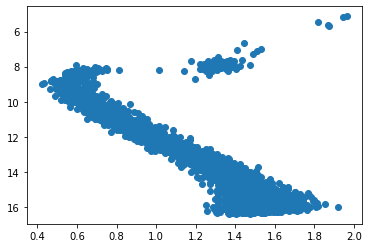

In [50]:
plt.scatter(ag3['B-V'],ag3['V'])
plt.gca().invert_yaxis()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
print(classifier.predict(sc.transform([[1.25,6]])))

[False]


In [53]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ True  True]
 [ True  True]
 [ True  True]
 ...
 [ True  True]
 [ True  True]
 [ True  True]]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 41   0]
 [  3 667]]


0.9957805907172996

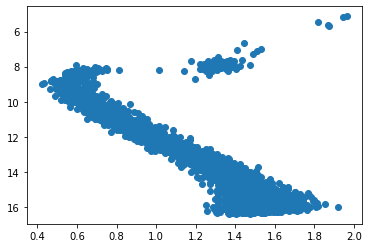

In [55]:
plt.scatter(ag3['B-V'],ag3['V'])
plt.gca().invert_yaxis()

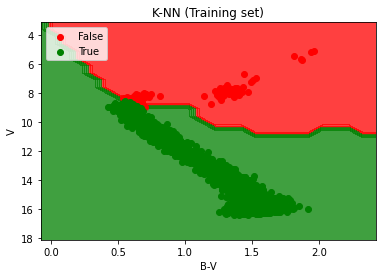

In [58]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max() + 0.5, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 2, stop = X_set[:, 1].max() + 2, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('B-V')
plt.ylabel('V')
plt.legend()
plt.gca().invert_yaxis()